In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('data/train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df = pd.read_csv('data/test.csv')

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train_df.drop(['Name','Ticket'],axis=1,inplace=True)

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
train_df.Cabin.isnull().values.sum()

687

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train_df.describe(include=['O'])


,Sex,Cabin,Embarked
count,891,204,889
unique,2,147,3
top,male,G6,S
freq,577,4,644


In [14]:
#Since we have to many null values in Cabin column
# lets define null values "UN" i.e. unknown

train_df['Cabin'] = train_df['Cabin'].fillna('UN')
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

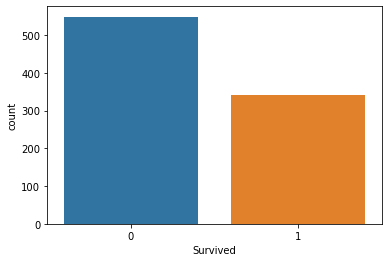

In [15]:
# Find out how many servived and not survived
sns.countplot(x=train_df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

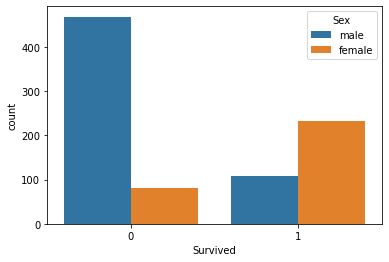

In [16]:
#above plot shows that majority of the people are not survived
# lets see how many are men and woment survived and not survived
sns.countplot(x= train_df['Survived'],hue=train_df['Sex'])

In [17]:
import matplotlib.ticker as ticker

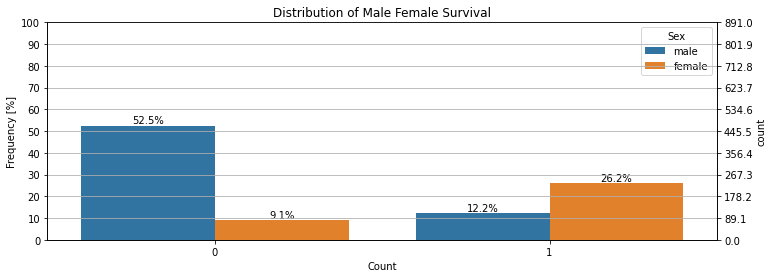

In [18]:
ncount = len(train_df['Survived'])
plt.figure(figsize=(12,4))
ax = sns.countplot(x= train_df['Survived'],hue=train_df['Sex'])
plt.title('Distribution of Male Female Survival')
plt.xlabel('Count')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)


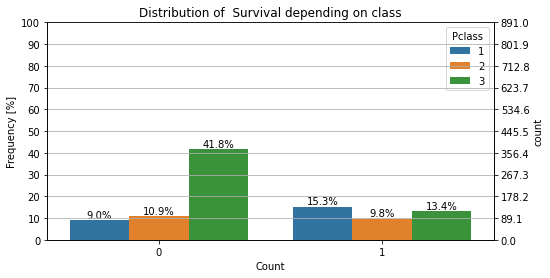

In [19]:
ncount = len(train_df['Survived'])
plt.figure(figsize=(8,4))
ax = sns.countplot(x= train_df['Survived'],hue=train_df['Pclass'])
plt.title('Distribution of  Survival depending on class')
plt.xlabel('Count')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)


C:\Users\sajain\Miniconda3\envs\sss_ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

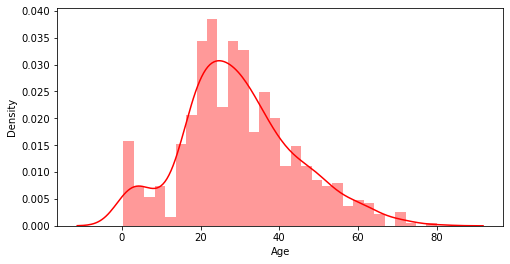

In [20]:
plt.figure(figsize=(8,4))
sns.distplot(train_df['Age'].dropna(),kde=True,bins=30,color='red')

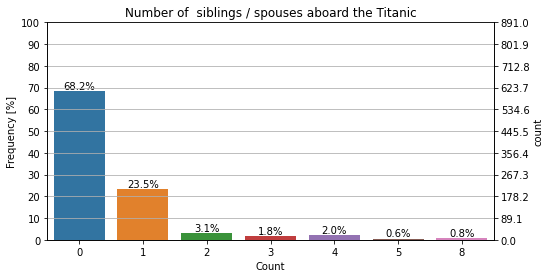

In [21]:
#sns.countplot(train_df['SibSp'])
ncount = len(train_df['SibSp'])
plt.figure(figsize=(8,4))
ax = sns.countplot(x= train_df['SibSp'])
plt.title('Number of  siblings / spouses aboard the Titanic')
plt.xlabel('Count')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

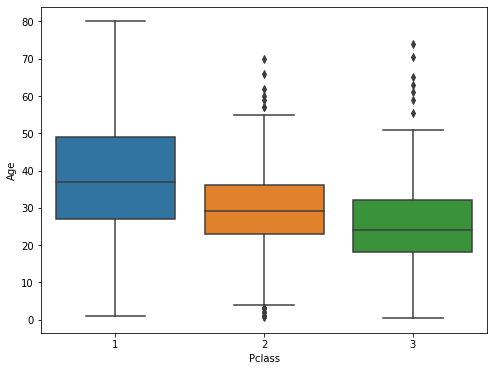

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=train_df)


In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,UN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,UN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,UN,S


In [24]:
def age_impute(cols):
    Pclass = cols[0]
    Age = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37

        if Pclass ==  2:
            return 29

        if Pclass == 3:
            return 24
    
    else:
        return(Age)
       

In [25]:
train_df['Imputed_age'] =  train_df[['Pclass','Age']].apply(age_impute,axis=1)

In [26]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Imputed_age
0,1,0,3,male,22.0,1,0,7.2500,UN,S,22.0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,38.0
2,3,1,3,female,26.0,0,0,7.9250,UN,S,26.0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,35.0
4,5,0,3,male,35.0,0,0,8.0500,UN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,UN,S,27.0
887,888,1,1,female,19.0,0,0,30.0000,B42,S,19.0
888,889,0,3,female,NaN,1,2,23.4500,UN,S,24.0
889,890,1,1,male,26.0,0,0,30.0000,C148,C,26.0


C:\Users\sajain\Miniconda3\envs\sss_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

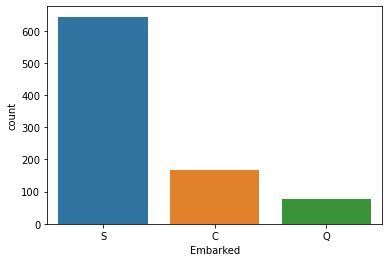

In [27]:
sns.countplot(train_df['Embarked'])

In [28]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

In [29]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Imputed_age      0
dtype: int64

In [30]:
train_df['Imputed_cabin'] = train_df['Cabin'].str[:1]

In [31]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'Imputed_age', 'Imputed_cabin'],
      dtype='object')

In [32]:
train_df_useful_col = train_df[['Pclass', 'Sex', 'SibSp', 'Parch','Fare', 'Embarked', 'Imputed_age', 'Imputed_cabin']]

In [33]:
y_train = train_df['Survived']

In [34]:
train_df_useful_col

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Imputed_age,Imputed_cabin
0,3,male,1,0,7.2500,S,22.0,U
1,1,female,1,0,71.2833,C,38.0,C
2,3,female,0,0,7.9250,S,26.0,U
3,1,female,1,0,53.1000,S,35.0,C
4,3,male,0,0,8.0500,S,35.0,U
...,...,...,...,...,...,...,...,...
886,2,male,0,0,13.0000,S,27.0,U
887,1,female,0,0,30.0000,S,19.0,B
888,3,female,1,2,23.4500,S,24.0,U
889,1,male,0,0,30.0000,C,26.0,C


In [35]:
pd.get_dummies(train_df_useful_col,drop_first=True)

,Pclass,SibSp,Parch,Fare,Imputed_age,Sex_male,Embarked_Q,Embarked_S,Imputed_cabin_B,Imputed_cabin_C,Imputed_cabin_D,Imputed_cabin_E,Imputed_cabin_F,Imputed_cabin_G,Imputed_cabin_T,Imputed_cabin_U
0,3,1,0,7.2500,22.0,1,0,1,0,0,0,0,0,0,0,1
1,1,1,0,71.2833,38.0,0,0,0,0,1,0,0,0,0,0,0
2,3,0,0,7.9250,26.0,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,53.1000,35.0,0,0,1,0,1,0,0,0,0,0,0
4,3,0,0,8.0500,35.0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,27.0,1,0,1,0,0,0,0,0,0,0,1
887,1,0,0,30.0000,19.0,0,0,1,1,0,0,0,0,0,0,0
888,3,1,2,23.4500,24.0,0,0,1,0,0,0,0,0,0,0,1
889,1,0,0,30.0000,26.0,1,0,0,0,1,0,0,0,0,0,0


In [36]:
train_df_encoded_col = pd.get_dummies(train_df_useful_col,columns=['Pclass','Sex','Embarked','Imputed_cabin'],drop_first=True)

In [37]:
train_df_encoded_col

,SibSp,Parch,Fare,Imputed_age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Imputed_cabin_B,Imputed_cabin_C,Imputed_cabin_D,Imputed_cabin_E,Imputed_cabin_F,Imputed_cabin_G,Imputed_cabin_T,Imputed_cabin_U
0,1,0,7.2500,22.0,0,1,1,0,1,0,0,0,0,0,0,0,1
1,1,0,71.2833,38.0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,7.9250,26.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,0,53.1000,35.0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,0,0,8.0500,35.0,0,1,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,27.0,1,0,1,0,1,0,0,0,0,0,0,0,1
887,0,0,30.0000,19.0,0,0,0,0,1,1,0,0,0,0,0,0,0
888,1,2,23.4500,24.0,0,1,0,0,1,0,0,0,0,0,0,0,1
889,0,0,30.0000,26.0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [38]:
train_df_encoded_col.describe()

,SibSp,Parch,Fare,Imputed_age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Imputed_cabin_B,Imputed_cabin_C,Imputed_cabin_D,Imputed_cabin_E,Imputed_cabin_F,Imputed_cabin_G,Imputed_cabin_T,Imputed_cabin_U
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.523008,0.381594,32.204208,29.066409,0.206510,0.551066,0.647587,0.086420,0.725028,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044
std,1.102743,0.806057,49.693429,13.244532,0.405028,0.497665,0.477990,0.281141,0.446751,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397
min,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.910400,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,14.454200,26.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,31.000000,37.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,8.000000,6.000000,512.329200,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\sajain\Miniconda3\envs\sss_ds\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Imputed_age', ylabel='Density'>

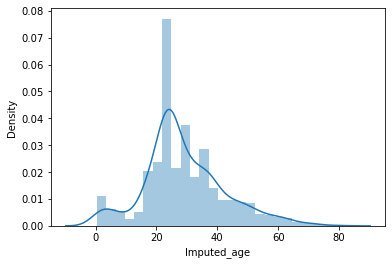

In [39]:
sns.distplot(train_df_encoded_col['Imputed_age'],kde=True)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
train_df_encoded_col_scaled = scaler.fit_transform(train_df_encoded_col)

In [41]:
train_df_encoded_col_scaled

array([[ 0.43279337, -0.47367361, -0.50244517, ..., -0.06715343,
        -0.03352008,  0.54492498],
       [ 0.43279337, -0.47367361,  0.78684529, ..., -0.06715343,
        -0.03352008, -1.835115  ],
       [-0.4745452 , -0.47367361, -0.48885426, ..., -0.06715343,
        -0.03352008,  0.54492498],
       ...,
       [ 0.43279337,  2.00893337, -0.17626324, ..., -0.06715343,
        -0.03352008,  0.54492498],
       [-0.4745452 , -0.47367361, -0.04438104, ..., -0.06715343,
        -0.03352008, -1.835115  ],
       [-0.4745452 , -0.47367361, -0.49237783, ..., -0.06715343,
        -0.03352008,  0.54492498]])

In [42]:
#Lets impute Age missing value using supervised learning , regression algorithm
train_df[train_df['Age'].isnull() ]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Imputed_age,Imputed_cabin
5,6,0,3,male,NaN,0,0,8.4583,UN,Q,24.0,U
17,18,1,2,male,NaN,0,0,13.0000,UN,S,29.0,U
19,20,1,3,female,NaN,0,0,7.2250,UN,C,24.0,U
26,27,0,3,male,NaN,0,0,7.2250,UN,C,24.0,U
28,29,1,3,female,NaN,0,0,7.8792,UN,Q,24.0,U
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,7.2292,UN,C,24.0,U
863,864,0,3,female,NaN,8,2,69.5500,UN,S,24.0,U
868,869,0,3,male,NaN,0,0,9.5000,UN,S,24.0,U
878,879,0,3,male,NaN,0,0,7.8958,UN,S,24.0,U


<AxesSubplot:>

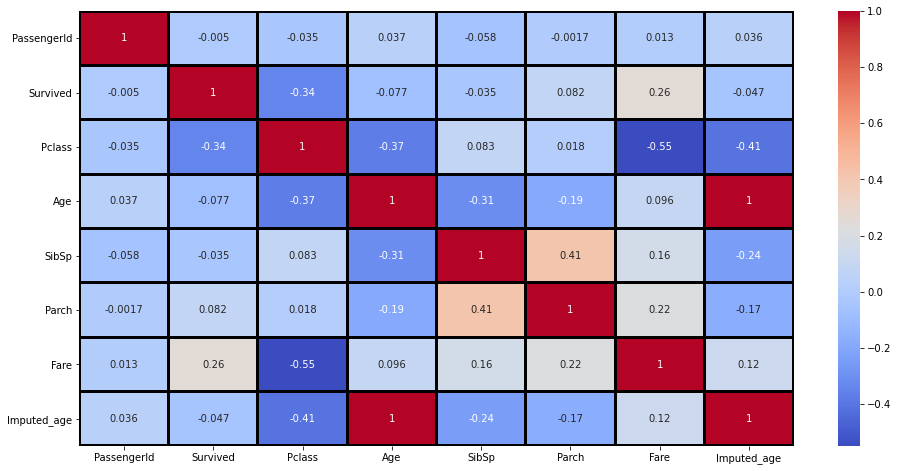

In [43]:
train_df
correlation = train_df.corr()
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(correlation,cmap='coolwarm',annot=True, linewidths=2, ax=ax,linecolor='black')

In [44]:
#It seems that age is correlated with Pclass, SibSp,Parch
# imputing age column missing values

from sklearn.linear_model import LinearRegression

impute_using_data = train_df.copy(deep=True)

In [45]:
impute_using_data['Sex'] = [1 if x == 'male' else 0 for x in impute_using_data['Sex']]

In [46]:
impute_using_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Imputed_age,Imputed_cabin
0,1,0,3,1,22.0,1,0,7.2500,UN,S,22.0,U
1,2,1,1,0,38.0,1,0,71.2833,C85,C,38.0,C
2,3,1,3,0,26.0,0,0,7.9250,UN,S,26.0,U
3,4,1,1,0,35.0,1,0,53.1000,C123,S,35.0,C
4,5,0,3,1,35.0,0,0,8.0500,UN,S,35.0,U
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,UN,S,27.0,U
887,888,1,1,0,19.0,0,0,30.0000,B42,S,19.0,B
888,889,0,3,0,NaN,1,2,23.4500,UN,S,24.0,U
889,890,1,1,1,26.0,0,0,30.0000,C148,C,26.0,C


In [47]:
impute_using_data.drop(['PassengerId','Cabin','Embarked'],inplace=True,axis=1)

In [48]:
impute_using_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Imputed_age,Imputed_cabin
0,0,3,1,22.0,1,0,7.2500,22.0,U
1,1,1,0,38.0,1,0,71.2833,38.0,C
2,1,3,0,26.0,0,0,7.9250,26.0,U
3,1,1,0,35.0,1,0,53.1000,35.0,C
4,0,3,1,35.0,0,0,8.0500,35.0,U
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,27.0,U
887,1,1,0,19.0,0,0,30.0000,19.0,B
888,0,3,0,NaN,1,2,23.4500,24.0,U
889,1,1,1,26.0,0,0,30.0000,26.0,C


In [49]:
impute_test_data = impute_using_data[impute_using_data['Age'].isnull()]
impute_test_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Imputed_age,Imputed_cabin
5,0,3,1,NaN,0,0,8.4583,24.0,U
17,1,2,1,NaN,0,0,13.0000,29.0,U
19,1,3,0,NaN,0,0,7.2250,24.0,U
26,0,3,1,NaN,0,0,7.2250,24.0,U
28,1,3,0,NaN,0,0,7.8792,24.0,U
...,...,...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292,24.0,U
863,0,3,0,NaN,8,2,69.5500,24.0,U
868,0,3,1,NaN,0,0,9.5000,24.0,U
878,0,3,1,NaN,0,0,7.8958,24.0,U


In [50]:
impute_train_data = impute_using_data.dropna()
impute_train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Imputed_age,Imputed_cabin
0,0,3,1,22.0,1,0,7.2500,22.0,U
1,1,1,0,38.0,1,0,71.2833,38.0,C
2,1,3,0,26.0,0,0,7.9250,26.0,U
3,1,1,0,35.0,1,0,53.1000,35.0,C
4,0,3,1,35.0,0,0,8.0500,35.0,U
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,39.0,U
886,0,2,1,27.0,0,0,13.0000,27.0,U
887,1,1,0,19.0,0,0,30.0000,19.0,B
889,1,1,1,26.0,0,0,30.0000,26.0,C


In [51]:
y_train = impute_train_data['Age']

In [52]:
X_train = impute_train_data.drop("Age", axis=1)

In [53]:
y_train

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [54]:
X_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Imputed_age,Imputed_cabin
0,0,3,1,1,0,7.2500,22.0,U
1,1,1,0,1,0,71.2833,38.0,C
2,1,3,0,0,0,7.9250,26.0,U
3,1,1,0,1,0,53.1000,35.0,C
4,0,3,1,0,0,8.0500,35.0,U
...,...,...,...,...,...,...,...,...
885,0,3,0,0,5,29.1250,39.0,U
886,0,2,1,0,0,13.0000,27.0,U
887,1,1,0,0,0,30.0000,19.0,B
889,1,1,1,0,0,30.0000,26.0,C


In [55]:
X_test = impute_test_data.drop("Age",axis=1)

In [56]:
X_test

,Survived,Pclass,Sex,SibSp,Parch,Fare,Imputed_age,Imputed_cabin
5,0,3,1,0,0,8.4583,24.0,U
17,1,2,1,0,0,13.0000,29.0,U
19,1,3,0,0,0,7.2250,24.0,U
26,0,3,1,0,0,7.2250,24.0,U
28,1,3,0,0,0,7.8792,24.0,U
...,...,...,...,...,...,...,...,...
859,0,3,1,0,0,7.2292,24.0,U
863,0,3,0,8,2,69.5500,24.0,U
868,0,3,1,0,0,9.5000,24.0,U
878,0,3,1,0,0,7.8958,24.0,U


In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'U'

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
# in the above predicted out we are getting few negative value and age can not be negative 
# lets try with datawig library
#!pip install datawig

In [ ]:
import datawig

In [ ]:
data = pd.read_csv("train.csv")
df_impute_train, df_impute_test = datawig.utils.random_split(data)

In [ ]:
imputer = datawig.SimpleImputer(
    input_columns=['Pclass','SibSp','Parch'], # column(s) containing information about the column we want to impute
    output_column= 'Age', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

In [ ]:
imputer.fit(train_df=df_impute_train, num_epochs=5000, patience =50 )

In [ ]:
imputed = imputer.predict(df_impute_test)

In [ ]:
imputed